# Import section

In [1]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import fiona
import shapely
# import momepy
from matplotlib import pyplot as plt
from fiona.crs import from_epsg
from shapely.geometry import Point, LineString, Polygon
from tqdm import tqdm
from util import *

for ext in ['kml', 'KML', 'libkml', 'LIBKML']: # enable KML support which is disabled by default
    gpd.io.file.fiona.drvsupport.supported_drivers[ext] = 'rw'

# Loading datasets

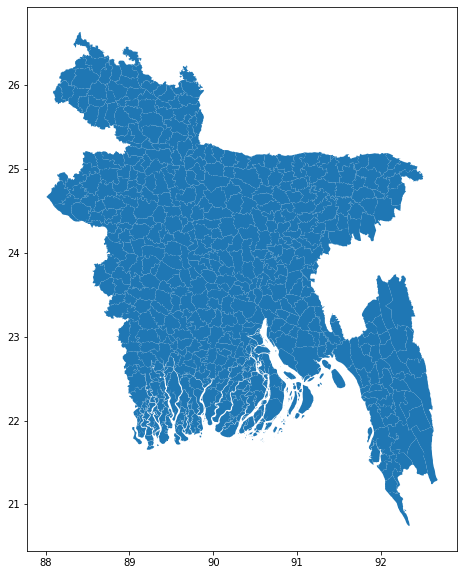

In [2]:
poly_bangladesh = gpd.read_file(get_shapefile_name('Data/Bangladesh 4 level admin/Subdistricts'))
poly_bangladesh.plot(figsize=(10, 10));

In [3]:
poly_bangladesh.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,20,BGD,Bangladesh,1,Barisal,1,Barisal,1,Agailjhara,Upazila|Thana|Po,Sub-district,None,None,"POLYGON ((90.13228 23.02925, 90.13877 23.03056..."
1,20,BGD,Bangladesh,1,Barisal,1,Barisal,2,Babuganj,Upazila|Thana|Po,Sub-district,None,None,"POLYGON ((90.27067 22.73984, 90.26520 22.74118..."
2,20,BGD,Bangladesh,1,Barisal,1,Barisal,3,Bakerganj,Upazila|Thana|Po,Sub-district,None,None,"MULTIPOLYGON (((90.35285 22.61147, 90.35315 22..."
3,20,BGD,Bangladesh,1,Barisal,1,Barisal,4,Banaripara,Upazila|Thana|Po,Sub-district,None,None,"POLYGON ((90.19837 22.78146, 90.19374 22.78425..."
4,20,BGD,Bangladesh,1,Barisal,1,Barisal,5,Barisal S.,Upazila|Thana|Po,Sub-district,None,None,"MULTIPOLYGON (((90.31945 22.66389, 90.31913 22..."


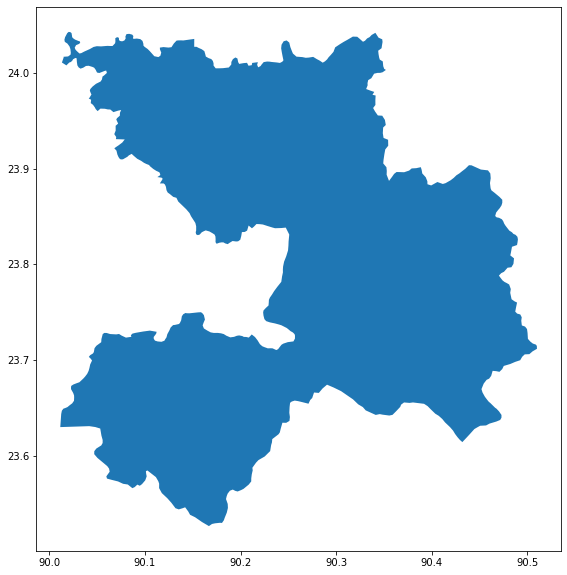

In [4]:
poly_dhaka = poly_bangladesh.loc[poly_bangladesh['NAME_2'] == 'Dhaka']['geometry'].to_list()
poly_dhaka = shapely.ops.cascaded_union(poly_dhaka)
gpd.GeoSeries(poly_dhaka).plot(figsize=(10, 10));

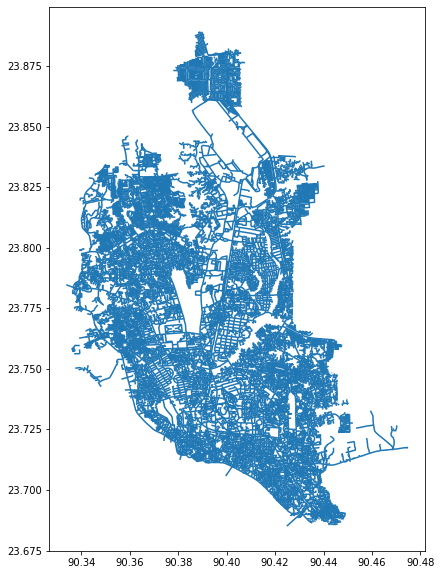

In [5]:
gdf_dhaka_road = pd.read_csv('Data/dhaka_road_system.csv')
gdf_dhaka_road['the_geom'] = gdf_dhaka_road['the_geom'].apply(lambda g: shapely.wkt.loads(g)[0])
gdf_dhaka_road = gpd.GeoDataFrame(gdf_dhaka_road, crs=from_epsg(4326), geometry='the_geom')
gdf_dhaka_road.plot(figsize=(10, 10));

In [6]:
df_street = pd.read_csv('Data/Problem Statement/Roadmap-Dhaka.csv', header=None, sep='\n')[0].str.split(',', expand=True).drop(columns=0)

gdf_street = gpd.GeoDataFrame(columns=['roads', 'src', 'dst'], geometry='roads', crs=from_epsg(4326))

for _, row in tqdm(df_street.iterrows(), total=df_street.shape[0]):
    roads = []
    for i in range(row.shape[0]):
        # Skip the longitude values, as they are used while iterating through the langitude values
        if i % 2 == 1:
            continue
            
        # Stop if alt value is found
        if float(row[i+3]) == 0:
            break
        
        p1 = Point(float(row[i+1]), float(row[i+2]))
        p2 = Point(float(row[i+3]), float(row[i+4]))
        line = LineString([p1, p2])
        gdf_street = gdf_street.append({'roads': line, 'src': None, 'dst': None}, ignore_index=True)

# gdf_street['roads'] = gdf_street['roads'].apply(lambda row: LineString([Point(item) for item in row]))
gdf_street = gdf_street.to_crs(epsg=3106)

gdf_metro = read_route_csv('Data/Problem Statement/Routemap-DhakaMetroRail.csv')
gdf_uttara_bus = read_route_csv('Data/Problem Statement/Routemap-UttaraBus.csv')
gdf_bikolpo_bus = read_route_csv('Data/Problem Statement/Routemap-BikolpoBus.csv')

100%|██████████| 49869/49869 [03:46<00:00, 220.54it/s]


In [7]:
gdf_street.to_file("outputs/bikolpo_uttara_metro/street.shp")
gdf_metro.to_file("outputs/bikolpo_uttara_metro/metro.shp")
gdf_uttara_bus.to_file("outputs/bikolpo_uttara_metro/uttara.shp")
gdf_bikolpo_bus.to_file("outputs/bikolpo_uttara_metro/bikolpo.shp")

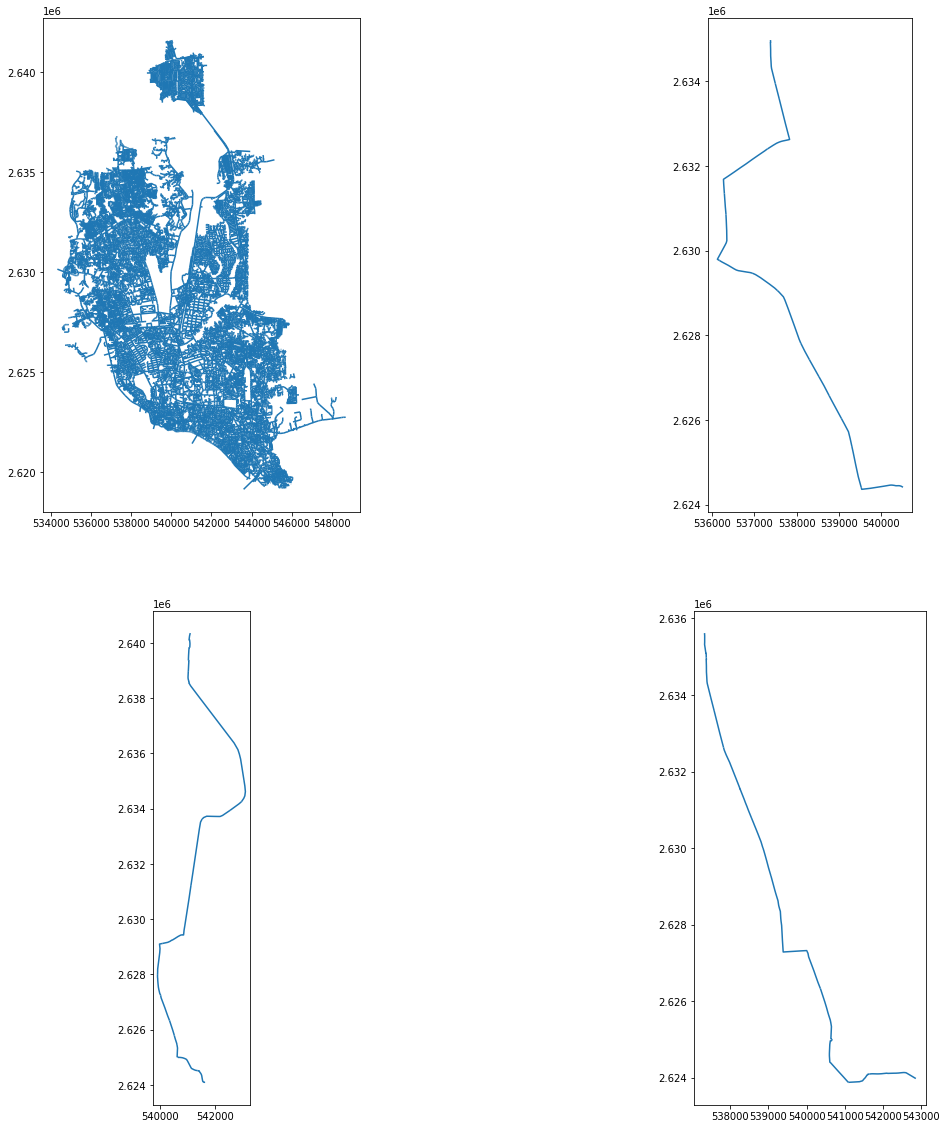

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
gdf_street.plot(ax=ax1)
gdf_bikolpo_bus.plot(ax=ax2)
gdf_uttara_bus.plot(ax=ax3)
gdf_metro.plot(ax=ax4);

# Test Cases

In [9]:
final_src1 = (90.363833, 23.834145)
final_dst1 = (90.37836, 23.75693)

# Used function from my utils library
final_src_meter1 = convert_point_crs(*final_src1, fromepsg=4326, toepsg=3106)
final_dst_meter1 = convert_point_crs(*final_dst1, fromepsg=4326, toepsg=3106)

final_src2 = (90.40023, 23.87596)
final_dst2 = (90.367982, 23.835966)

final_src_meter2 = convert_point_crs(*final_src2, fromepsg=4326, toepsg=3106)
final_dst_meter2 = convert_point_crs(*final_dst2, fromepsg=4326, toepsg=3106)

final_src3 = (90.36295, 23.80874)
final_dst3 = (90.40737, 23.73176)

final_src_meter3 = convert_point_crs(*final_src3, fromepsg=4326, toepsg=3106)
final_dst_meter3 = convert_point_crs(*final_dst3, fromepsg=4326, toepsg=3106)

final_src4 = (90.401026, 23.876867)
final_dst4 = (90.37866, 23.77485)

final_src_meter4 = convert_point_crs(*final_src4, fromepsg=4326, toepsg=3106)
final_dst_meter4 = convert_point_crs(*final_dst4, fromepsg=4326, toepsg=3106)

final_src5 = (90.421608, 23.829503)
final_dst5 = (90.37970, 23.77603)

final_src_meter5 = convert_point_crs(*final_src5, fromepsg=4326, toepsg=3106)
final_dst_meter5 = convert_point_crs(*final_dst5, fromepsg=4326, toepsg=3106)

# Problem 1

## Graph building

In [10]:
graph_street = get_graph_from_gdf(gdf_street, cost=1, speed=1, road_type='street')
print(graph_street.number_of_edges())
print(graph_street.number_of_nodes())
graph = graph_street

53878
46669


In [11]:
print(graph.size())

53878


## Shortest Path

 The total distance to travel is : 0.18


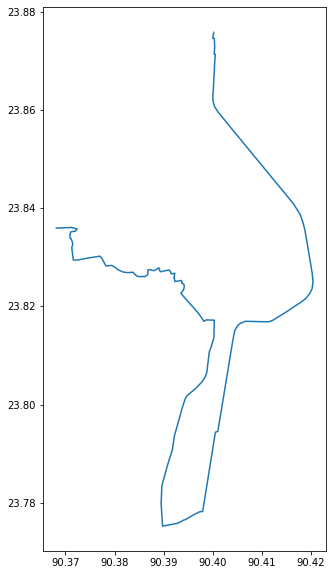

In [12]:
src = final_src_meter2
dst = final_dst_meter2

src_nearest_line, src_nearest_point, src_nearest_nd_1, src_nearest_nd_2, src_nearest_dist1, src_nearest_dist2 = get_nearest_point(Point(src), gdf_street['roads'])
dst_nearest_line, dst_nearest_point, dst_nearest_nd_1, dst_nearest_nd_2, dst_nearest_dist1, dst_nearest_dist2 = get_nearest_point(Point(dst), gdf_street['roads'])

gpd.GeoDataFrame([Point(src), Point(dst)], columns=['points'], geometry='points', crs=from_epsg(3106)).to_crs(epsg=4326).to_file('outputs/1/points.kml', driver='kml')
gpd.GeoDataFrame([src_nearest_point, dst_nearest_point], columns=['points'], geometry='points', crs=from_epsg(3106)).to_crs(epsg=4326).to_file('outputs/1/nearest_points.kml', driver='kml')

graph.add_edge((*src_nearest_point.coords), src, distance=0, road='walk')
graph.add_edge((*src_nearest_nd_1.coords), (*src_nearest_point.coords), distance=src_nearest_dist1, road='street')
graph.add_edge((*src_nearest_nd_2.coords), (*src_nearest_point.coords), distance=src_nearest_dist2, road='street')

graph.add_edge((*dst_nearest_point.coords), dst, distance=0, road='walk')
graph.add_edge((*dst_nearest_nd_1.coords), (*dst_nearest_point.coords), distance=dst_nearest_dist1, road='street')
graph.add_edge((*dst_nearest_nd_2.coords), (*dst_nearest_point.coords), distance=dst_nearest_dist2, road='street')

path = nx.shortest_path(graph, src, dst, weight='length')
cost = nx.shortest_path_length(graph, src, dst, weight='length')/1000

path_gdf = gpd.GeoDataFrame([LineString(path if len(path) > 1 else path + path)], columns=['geometry'], crs=from_epsg(3106)).to_crs(epsg=4326)
path_gdf.plot(figsize=(10, 10))
path_gdf.to_file('outputs/1/path.kml', driver='kml')

print(f' The total distance to travel is : {cost}')

## Text description

In [13]:
textual = f'''Problem No: 1
Source: {path[0]}
Destination: {path[-1]}
Total Cost: {cost}

'''
for i, (node1, node2) in enumerate(zip(path, path[1:])):
    cost = graph.get_edge_data(node1, node2)[0]
    textual += f"{i+1}. Cost: ৳{cost}: {'Drive' if cost['road'] == 'street' else 'Walk'} from Source {node1} to {node2}.\n"

with open('outputs/1/text.txt', 'w') as file:
    file.write(textual)

print(textual)

Problem No: 1
Source: (541030.2223074018, 2640256.142246091)
Destination: (537758.5853968054, 2635819.3987398986)
Total Cost: 0.18

1. Cost: ৳{'distance': 0, 'road': 'walk'}: Walk from Source (541030.2223074018, 2640256.142246091) to (541030.0997623975, 2640256.1360797947).
2. Cost: ৳{'distance': 0.4375266026597803, 'road': 'street'}: Drive from Source (541030.0997623975, 2640256.1360797947) to (541030.121750315, 2640255.699106043).
3. Cost: ৳{'cost': 0.14828955716646527, 'road': 'street', 'time': 0.14828955716646527, 'src': None, 'dst': None}: Drive from Source (541030.121750315, 2640255.699106043) to (541008.850918095, 2640108.9430347504).
4. Cost: ৳{'cost': 0.03138131054075558, 'road': 'street', 'time': 0.03138131054075558, 'src': None, 'dst': None}: Drive from Source (541008.850918095, 2640108.9430347504) to (541040.205020719, 2640110.2495185426).
5. Cost: ৳{'cost': 0.18282252653475575, 'road': 'street', 'time': 0.18282252653475575, 'src': None, 'dst': None}: Drive from Source (541

# Problem 2

## Graph building

In [14]:
graph_street = get_graph_from_gdf(gdf_street, cost=20, speed=1, road_type='street')
graph_metro = get_graph_from_gdf(gdf_metro, cost=5, speed=1, road_type='metro')

In [15]:
graph = nx.compose(graph_street, graph_metro)

## Shortest Path

 The total distance to travel is : 0.07205705447333091


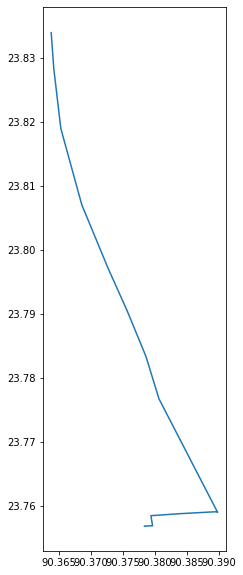

In [16]:
src = final_src_meter1
dst = final_dst_meter1

src_nearest_line, src_nearest_point, src_nearest_nd_1, src_nearest_nd_2, src_nearest_dist1, src_nearest_dist2 = get_nearest_point(Point(src), gdf_street['roads'])
dst_nearest_line, dst_nearest_point, dst_nearest_nd_1, dst_nearest_nd_2, dst_nearest_dist1, dst_nearest_dist2 = get_nearest_point(Point(dst), gdf_street['roads'])

gpd.GeoDataFrame([Point(src), Point(dst)], columns=['points'], geometry='points', crs=from_epsg(3106)).to_crs(epsg=4326).to_file('outputs/1/points.kml', driver='kml')
gpd.GeoDataFrame([src_nearest_point, dst_nearest_point], columns=['points'], geometry='points', crs=from_epsg(3106)).to_crs(epsg=4326).to_file('outputs/1/nearest_points.kml', driver='kml')

graph.add_edge((*src_nearest_point.coords), src, road='walk', cost=0, time=0, src=None, dst=None)
graph.add_edge((*src_nearest_nd_1.coords), (*src_nearest_point.coords), cost=src_nearest_dist1, road='street', time=0, src=None, dst=None)
graph.add_edge((*src_nearest_nd_2.coords), (*src_nearest_point.coords), cost=src_nearest_dist2, road='street', time=0, src=None, dst=None)

graph.add_edge((*dst_nearest_point.coords), dst, cost=0, road='walk', time=0, src=None, dst=None)
graph.add_edge((*dst_nearest_nd_1.coords), (*dst_nearest_point.coords), cost=dst_nearest_dist1, road='street', time=0, src=None, dst=None)
graph.add_edge((*dst_nearest_nd_2.coords), (*dst_nearest_point.coords), cost=dst_nearest_dist2, road='street', time=0, src=None, dst=None)

path = nx.shortest_path(graph, src, dst, weight='cost')
cost = nx.shortest_path_length(graph, src, dst, weight='cost')/1000

path_gdf = gpd.GeoDataFrame([LineString(path)], columns=['geometry'], crs=from_epsg(3106)).to_crs(epsg=4326)
path_gdf.plot(figsize=(10, 10))
path_gdf.to_file('outputs/1/path.kml', driver='kml')

print(f' The total distance to travel is : {cost}')

## Text description

In [17]:
textual = f'''Problem No: 2
Source: {path[0]}
Destination: {path[-1]}
Total Cost: {cost}

'''

edge = graph.get_edge_data(path[0], path[1])[0]
if edge['road'] == 'walk':
    method = 'walk'
elif edge['road'] == 'street':
    method = 'Drive car'
elif edge['road'] == 'metro':
    method = 'Ride metro'

last_method = method
cum_cost = 0
i = 1
last_node = path[0]
last_route = ()

for node1, node2 in zip(path[0:], path[1:]):
    edge = graph.get_edge_data(node1, node2)[0]
    if edge['road'] == 'walk':
        method = 'walk'
    elif edge['road'] == 'street':
        method = 'Drive car'
    elif edge['road'] == 'metro':
        method = 'Ride metro'
    
    if method == last_method:
        cum_cost += edge['cost']
    else:
        if last_route:
            textual += f"{i}. Cost: ৳{cum_cost}: {last_method} from Source {last_route[0]} {last_node} to {last_route[1]} {node1}.\n"
        else:
            textual += f"{i}. Cost: ৳{cum_cost}: {last_method} from Source {last_node} to {node1}.\n"
        cum_cost = edge['cost']
        if 'src' in edge:
            last_route = (edge['src'], edge['dst'])
        else:
            last_route = ()
        i += 1
        last_method = method
        last_node = node1
        
if last_method == 'walk':
    textual += f"{i}. Cost: ৳{cum_cost}: {last_method} from Source {last_node} to {path[-1]}.\n"

with open('outputs/2/text.txt', 'w') as file:
    file.write(textual)

print(textual)

Problem No: 2
Source: (537336.5679202364, 2635616.7014484513)
Destination: (538838.7976649158, 2627071.9692596635)
Total Cost: 0.07205705447333091

1. Cost: ৳43.95475984337328: Ride metro from Source (537336.5679202364, 2635616.7014484513) to (540008.0814977376, 2627313.0473616417).
2. Cost: ৳28.10229462995762: Drive car from Source None (540008.0814977376, 2627313.0473616417) to None (538838.8066357248, 2627071.765024931).
3. Cost: ৳0: walk from Source (538838.8066357248, 2627071.765024931) to (538838.7976649158, 2627071.9692596635).



# Problem 3

## Graph building

In [18]:
graph_street = get_graph_from_gdf(gdf_street, cost=20, speed=1, road_type='street')
graph_metro = get_graph_from_gdf(gdf_metro, cost=5, speed=1, road_type='metro')
graph_bikolpo = get_graph_from_gdf(gdf_uttara_bus, cost=7, speed=1, road_type='uttara_bus')
graph_uttara = get_graph_from_gdf(gdf_bikolpo_bus, cost=7, speed=1, road_type='bikolpo_bus')

In [19]:
print('Street Nodes:', graph_street.number_of_nodes())
print('Street Edges:', graph_street.number_of_edges())
print('Uttara bus Nodes:', graph_uttara.number_of_nodes())
print('Uttara bus Edges:', graph_uttara.number_of_edges())
print('Bikolpo bus Nodes:', graph_bikolpo.number_of_nodes())
print('Bikolpo bus Edges:', graph_bikolpo.number_of_edges())
print('Metro Nodes:', graph_metro.number_of_nodes())
print('Metro Edges:', graph_metro.number_of_edges())

Street Nodes: 46669
Street Edges: 53878
Uttara bus Nodes: 18
Uttara bus Edges: 17
Bikolpo bus Nodes: 20
Bikolpo bus Edges: 19
Metro Nodes: 15
Metro Edges: 14


## Merging Graphs

In [20]:
graph = nx.compose(graph_street, graph_bikolpo)

graph = nx.compose(graph, graph_uttara)
graph = nx.compose(graph, graph_metro)

## Shortest Path

 The total distance to travel is : 0.07205705447333091


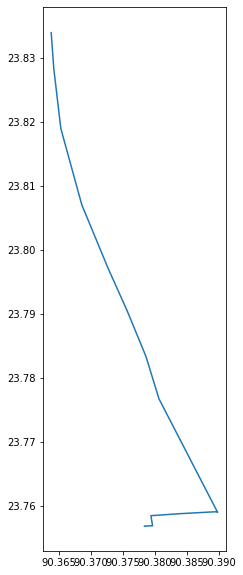

In [21]:
src = final_src_meter1
dst = final_dst_meter1

src_nearest_line, src_nearest_point, src_nearest_nd_1, src_nearest_nd_2, src_nearest_dist1, src_nearest_dist2 = get_nearest_point(Point(src), gdf_street['roads'])
dst_nearest_line, dst_nearest_point, dst_nearest_nd_1, dst_nearest_nd_2, dst_nearest_dist1, dst_nearest_dist2 = get_nearest_point(Point(dst), gdf_street['roads'])

gpd.GeoDataFrame([Point(src), Point(dst)], columns=['points'], geometry='points', crs=from_epsg(3106)).to_crs(epsg=4326).to_file('outputs/1/points.kml', driver='kml')
gpd.GeoDataFrame([src_nearest_point, dst_nearest_point], columns=['points'], geometry='points', crs=from_epsg(3106)).to_crs(epsg=4326).to_file('outputs/1/nearest_points.kml', driver='kml')

graph.add_edge((*src_nearest_point.coords), src, road='walk', cost=0, time=0, src=None, dst=None)
graph.add_edge((*src_nearest_nd_1.coords), (*src_nearest_point.coords), cost=src_nearest_dist1, road='street', time=0, src=None, dst=None)
graph.add_edge((*src_nearest_nd_2.coords), (*src_nearest_point.coords), cost=src_nearest_dist2, road='street', time=0, src=None, dst=None)

graph.add_edge((*dst_nearest_point.coords), dst, cost=0, road='walk', time=0, src=None, dst=None)
graph.add_edge((*dst_nearest_nd_1.coords), (*dst_nearest_point.coords), cost=dst_nearest_dist1, road='street', time=0, src=None, dst=None)
graph.add_edge((*dst_nearest_nd_2.coords), (*dst_nearest_point.coords), cost=dst_nearest_dist2, road='street', time=0, src=None, dst=None)

path = nx.shortest_path(graph, src, dst, weight='cost')
cost = nx.shortest_path_length(graph, src, dst, weight='cost')/1000

path_gdf = gpd.GeoDataFrame([LineString(path)], columns=['geometry'], crs=from_epsg(3106)).to_crs(epsg=4326)
path_gdf.plot(figsize=(10, 10))
path_gdf.to_file('outputs/1/path.kml', driver='kml')

print(f' The total distance to travel is : {cost}')

## Text description

In [22]:
textual = f'''Problem No: 3
Source: {path[0]}
Destination: {path[-1]}
Total Cost: {cost}

'''

edge = graph.get_edge_data(path[0], path[1])[0]
if edge['road'] == 'walk':
    method = 'walk'
elif edge['road'] == 'street':
    method = 'Drive car'
elif edge['road'] == 'metro':
    method = 'Ride metro'
elif edge['road'] == 'bus_uttara':
    method = 'Ride Uttara bus'
elif edge['road'] == 'bus_bikolpo':
    method = 'Ride Bikolpo bus'

last_method = method
cum_cost = 0
i = 1
last_node = path[0]
last_route = ()

for node1, node2 in zip(path[0:], path[1:]):
    edge = graph.get_edge_data(node1, node2)[0]
    if edge['road'] == 'walk':
        method = 'walk'
    elif edge['road'] == 'street':
        method = 'Drive car'
    elif edge['road'] == 'metro':
        method = 'Ride metro'
    elif edge['road'] == 'bus_uttara':
        method = 'Ride Uttara bus'
    elif edge['road'] == 'bus_bikolpo':
        method = 'Ride Bikolpo bus'
    
    if method == last_method:
        cum_cost += edge['cost']
    else:
        if last_route:
            textual += f"{i}. Cost: ৳{cum_cost}: {last_method} from Source {last_route[0]} {last_node} to {last_route[1]} {node1}.\n"
        else:
            textual += f"{i}. Cost: ৳{cum_cost}: {last_method} from Source {last_node} to {node1}.\n"
        cum_cost = edge['cost']
        if 'src' in edge:
            last_route = (edge['src'], edge['dst'])
        else:
            last_route = ()
        i += 1
        last_method = method
        last_node = node1
        
if last_method == 'walk':
    textual += f"{i}. Cost: ৳{cum_cost}: {last_method} from Source {last_node} to {path[-1]}.\n"

with open('outputs/3/text.txt', 'w') as file:
    file.write(textual)

print(textual)

Problem No: 3
Source: (537336.5679202364, 2635616.7014484513)
Destination: (538838.7976649158, 2627071.9692596635)
Total Cost: 0.07205705447333091

1. Cost: ৳43.95475984337328: Ride metro from Source (537336.5679202364, 2635616.7014484513) to (540008.0814977376, 2627313.0473616417).
2. Cost: ৳28.10229462995762: Drive car from Source None (540008.0814977376, 2627313.0473616417) to None (538838.8066357248, 2627071.765024931).
3. Cost: ৳0: walk from Source (538838.8066357248, 2627071.765024931) to (538838.7976649158, 2627071.9692596635).

